<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_04_Estadistica/EjercicioN14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

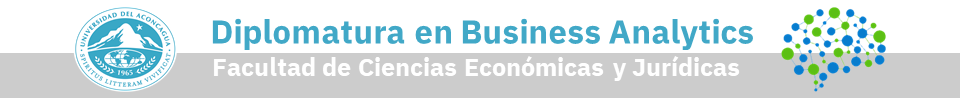

<center/>

<center>
<font color="#41a8c7">
<h2><b>
Estadística inferencial-Modelo Factores-Anova
</font>
</center>

**Ejercicio Nº14** El responsable de marketing de una fábrica de cervezas artesanales quiere estudiar la cantidad de litros vendidos de cervezas en sus tres puntos de ventas: Godoy Cruz (GC), San Martin (SM)  y San Rafael (SR). Se toma toma una muestra aleatoria mensuales de los últimos 24 meses.

Instalar Librería

In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




Cargar librería

In [ ]:
library(ggplot2)
library(lmtest)


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




1.Crear una estructura de datos (data frame)

Cargar datos

In [ ]:
litros_vendidos=c(6754,8026,6954,6747,7077,7607,7451,7138,7314,6808,7048,6401 ,7248,6889,6864,7081,6803,7513,
                  6512,6575,7588,6614,6788,7056,6662,7358,6145,6865,6531,7750,6109,6739,6615,7829,7135,7479,
                  6763,7376,7333,6664,6356,7277,7112,6818,6576,6970,7031,7457,9876,10067,10086,9684,10108,10227,
                  9853,9971,9979,9337,10775,10917,9957,9504,10193,9648,9635,9937,10031,10668,11470,10098,9289,8724)
  
  
 
punto_venta=c("GC" ,"GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC","GC",
              "GC","GC","GC","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR","SR",
             "SR","SR","SR","SR","SR","SR","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM","SM",
              "SM","SM","SM","SM","SM","SM","SM","SM","SM")

Transformar a factor

In [ ]:
punto_venta=as.factor(punto_venta)



Crear data frame

In [ ]:
datos=data.frame(litros_vendidos=litros_vendidos,punto_venta=punto_venta)
datos

litros_vendidos,punto_venta
<dbl>,<fct>
6754,GC
8026,GC
6954,GC
6747,GC
7077,GC
7607,GC
7451,GC
7138,GC
7314,GC


2.Construir el gráfico de caja y bigotes para cada factor o punto de venta

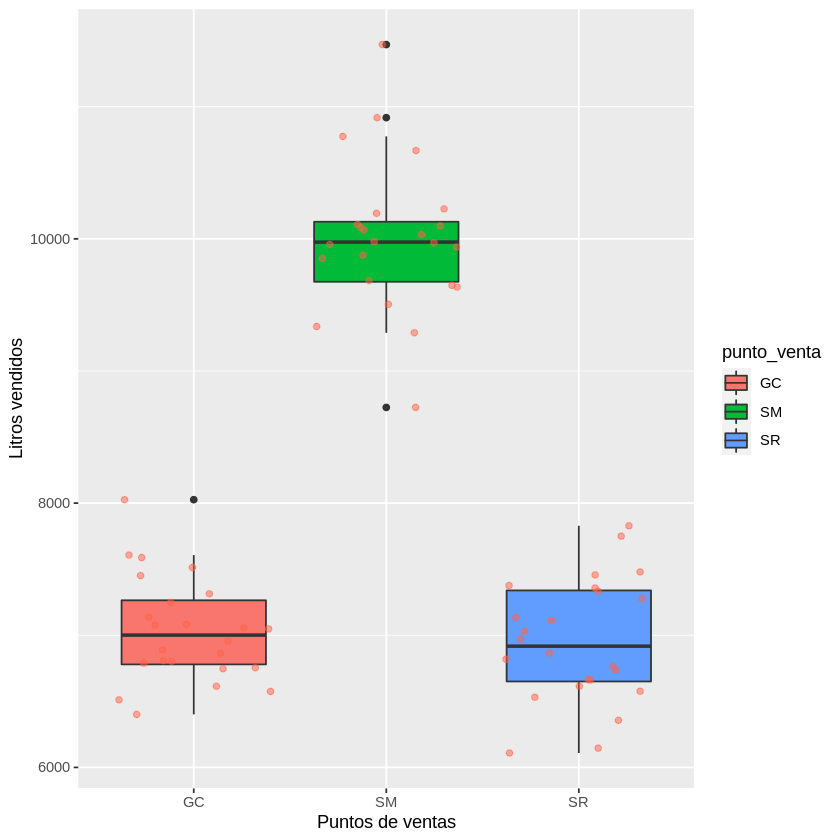

In [ ]:
g = ggplot(datos, aes(y=litros_vendidos,x=punto_venta))
g= g + geom_boxplot(aes(fill=punto_venta)) 
g=g+geom_jitter(alpha = 0.5, color = "tomato")
g=g+ylab("Litros vendidos")
g=g+xlab("Puntos de ventas")
g


3.Estimar el modelo

In [ ]:
options(contrasts = c("contr.sum","contr.poly"))

modelo=lm(litros_vendidos~punto_venta)


summary(modelo)


Call:
lm(formula = litros_vendidos ~ punto_venta)

Residuals:
     Min       1Q   Median       3Q      Max 
-1277.42  -292.75   -26.42   238.77  1468.58 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7997.78      56.78  140.85   <2e-16 ***
punto_venta1  -962.11      80.30  -11.98   <2e-16 ***
punto_venta2  2003.64      80.30   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 481.8 on 69 degrees of freedom
Multiple R-squared:  0.9003,	Adjusted R-squared:  0.8974 
F-statistic: 311.4 on 2 and 69 DF,  p-value: < 2.2e-16


4.¿Existe diferencia de ventas entre los distintos puntos de ventas?

Si

5.Controlar supuesto modelo

Test de shapiro-Wilks

H0: Es normal    vs    H1: no es normal

In [ ]:

shapiro.test(rstandard(modelo))



	Shapiro-Wilk normality test

data:  rstandard(modelo)
W = 0.98533, p-value = 0.5687


Test de bartlett

H0: todas las varianzas son iguales vs H1: al menos una diferente

In [ ]:
bartlett.test(rstandard(modelo)~punto_venta-1)




	Bartlett test of homogeneity of variances

data:  rstandard(modelo) by punto_venta
Bartlett's K-squared = 2.9099, df = 2, p-value = 0.2334


Durbin-Watson

H0: errores son independientes  vs H1: no son independientes

In [ ]:
dwtest(modelo)


	Durbin-Watson test

data:  modelo
DW = 1.8809, p-value = 0.2273
alternative hypothesis: true autocorrelation is greater than 0
